In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
try:
    df_wdi = pd.read_csv(r"data/gdp_data.csv", decimal=',', na_values='..')
except FileNotFoundError:
    print("File not found")
except ModuleNotFoundError:
    print("Package not found, please install it or change the environment")
else:
    print("The CSV loading was successful") 
    
df_wdi.head(3) # RAW

The CSV loading was successful


,Series Name,Series Code,Country Name,Country Code,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Argentina,ARG,7.92951713016532,7.73898107569444,6.94185160089025,7.93261011269163,3.00856892610517,-6.9103121153056,...,1.66091253843923,-3.02450095578762,1.91639608148853,-3.41553683867816,-2.69506723533574,-10.3361096878518,10.1485599877349,5.04819532337936,-1.89294979737558,-2.05840275449496
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Bangladesh,BGD,3.81635685042457,5.20131368672413,5.44042881455881,5.91320275589507,4.96057170242533,4.07076421640669,...,5.60449539732434,6.16181560014782,5.68710307010265,6.44197494702485,6.97264399779152,2.58647816564581,6.07069417020969,6.00847462887278,4.4907040939439,2.96499837954917
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,4.57169367299971,2.07730833836257,2.86752083975395,5.00147015838483,4.09221626720056,-1.0163236214624,...,-4.30639755912077,-4.01012719354725,0.587668928736335,1.09040860447158,0.562970837578547,-3.83550546659214,4.3179316171849,2.64631532411505,2.83370012861097,2.97747909274841


In [5]:
# Data cleaning and exploration
df_wdi.columns = [col.split(' [')[0] if ' [' in col else col for col in df_wdi.columns]
df_wdi = df_wdi.drop(['Series Name', 'Series Code'], axis=1)
df_wdi.head(3) # Now it is better to see the data

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,ARG,7.92951713016532,7.73898107569444,6.94185160089025,7.93261011269163,3.00856892610517,-6.9103121153056,8.96819672899282,4.88127252804149,...,1.66091253843923,-3.02450095578762,1.91639608148853,-3.41553683867816,-2.69506723533574,-10.3361096878518,10.1485599877349,5.04819532337936,-1.89294979737558,-2.05840275449496
1,Bangladesh,BGD,3.81635685042457,5.20131368672413,5.44042881455881,5.91320275589507,4.96057170242533,4.07076421640669,4.65046297355514,5.501503282369,...,5.60449539732434,6.16181560014782,5.68710307010265,6.44197494702485,6.97264399779152,2.58647816564581,6.07069417020969,6.00847462887278,4.4907040939439,2.96499837954917
2,Brazil,BRA,4.57169367299971,2.07730833836257,2.86752083975395,5.00147015838483,4.09221626720056,-1.0163236214624,6.62782994932327,3.13169854409105,...,-4.30639755912077,-4.01012719354725,0.587668928736335,1.09040860447158,0.562970837578547,-3.83550546659214,4.3179316171849,2.64631532411505,2.83370012861097,2.97747909274841


In [6]:
# Descriptive data
df_wdi_num = df_wdi.drop(columns=["Country Name", "Country Code"]). \
apply(pd.to_numeric, errors='coerce')

df_wdi_num.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
2004,58.0,4.319,2.432,0.721,2.259,3.784,5.394,11.059
2005,58.0,3.759,2.463,0.176,1.999,3.227,4.852,10.805
2006,58.0,4.410,2.553,-1.016,2.787,3.912,5.803,12.047
2007,58.0,4.264,2.754,-1.941,2.050,4.298,5.658,13.555
2008,58.0,1.657,3.264,-6.412,-0.503,1.521,3.614,11.144
2009,58.0,-2.204,4.349,-14.465,-5.246,-3.192,0.265,8.860
2010,58.0,3.633,3.103,-3.333,1.515,3.467,5.402,12.509
2011,58.0,2.966,2.857,-2.113,0.821,2.329,4.978,11.337
2012,58.0,1.485,2.735,-4.907,-0.235,1.442,3.432,7.127
2013,58.0,1.820,2.519,-6.370,0.150,1.730,3.560,7.617


In [7]:
print(df_wdi_num.isnull().mean()) # < 0.15 is Enough
print("\nObviously there are almost no missing values, because the sample size is small.\nBut this step is important for the next steps.")

2004    0.000000
2005    0.000000
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.000000
2013    0.000000
2014    0.000000
2015    0.000000
2016    0.000000
2017    0.000000
2018    0.000000
2019    0.000000
2020    0.000000
2021    0.000000
2022    0.000000
2023    0.000000
2024    0.017241
dtype: float64

Obviously there are almost no missing values, because the sample size is small.
But this step is important for the next steps.


In [ ]:
# Transform part
df_wdi.loc[:, '2004':'2024'] = df_wdi.loc[:, '2004':'2024'].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')

df_wdi['Pre_Crisis (2004-2008)'] = df_wdi.loc[:, '2004':'2008'].mean(axis=1)
df_wdi['Recuperation (2009-2013)'] = df_wdi.loc[:, '2009':'2013'].mean(axis=1)
df_wdi['Stability (2014-2018)'] = df_wdi.loc[:, '2014':'2018'].mean(axis=1)
df_wdi['Recent (2019-2024)'] = df_wdi.loc[:, '2019':'2024'].mean(axis=1)

results = df_wdi[['Pre_Crisis (2004-2008)', 'Recuperation (2009-2013)', 
                  'Stability (2014-2018)', 'Recent (2019-2024)']].round(2)

# Group by country (code)
emerging = [
    'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'DOM', 'EGY', 'ETH', 'GHA', 
    'HUN', 'IDN', 'IND', 'KAZ', 'KEN', 'MAR', 'MEX', 'MOZ', 'MYS', 'NGA', 
    'PAK', 'PER', 'PHL', 'POL', 'ROU', 'SAU', 'THA', 'TUR', 'VNM'
]

developed = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 
    'EST', 'FIN', 'FRA', 'GBR', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LUX', 'NLD', 'NOR', 'NZL', 'PRT', 'SGP', 'SVK', 'SVN', 'SWE', 'USA'
]

df_wdi['Group'] = df_wdi['Country Code']. \
apply(lambda x: 'Emerging' if x in emerging else 'Developed' if x in developed else None)

df_wdi # see the clean and transformed data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8756\804342874.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wdi.loc[:, '2004':'2024'] = df_wdi.loc[:, '2004':'2024'].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')


,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011,...,2020,2021,2022,2023,2024,Pre_Crisis (2004-2008),Recuperation (2009-2013),Stability (2014-2018),Recent (2019-2024),Group
0,Argentina,ARG,7.929517,7.738981,6.941852,7.93261,3.008569,-6.910312,8.968197,4.881273,...,-10.33611,10.14856,5.048195,-1.89295,-2.058403,6.710306,1.258869,-1.275199,-0.297629,Emerging
1,Bangladesh,BGD,3.816357,5.201314,5.440429,5.913203,4.960572,4.070764,4.650463,5.501503,...,2.586478,6.070694,6.008475,4.490704,2.964998,5.066375,4.950326,5.798889,4.848999,Emerging
2,Brazil,BRA,4.571694,2.077308,2.867521,5.00147,4.092216,-1.016324,6.62783,3.131699,...,-3.835505,4.317932,2.646315,2.8337,2.977479,3.722042,2.402774,-1.388322,1.583815,Emerging
3,Chile,CHL,5.60292,4.791828,5.019521,4.143862,2.757557,-2.11061,4.793637,5.18104,...,-6.981131,10.824551,1.648778,-0.019613,2.094155,4.463138,3.066709,0.868262,1.100774,Emerging
4,China,CHN,9.479239,10.804649,12.047282,13.555366,9.109747,8.859902,10.063424,8.864807,...,2.096867,8.473227,3.1477,5.524315,5.106625,10.999257,8.395674,6.363105,5.006939,Emerging
5,Colombia,COL,3.797159,3.371111,5.311744,5.394468,2.047991,-0.031705,3.314349,5.808235,...,-8.509495,9.592978,6.1878,-0.41023,0.656438,3.984494,3.221574,1.462946,1.479605,Emerging
6,Dominican Republic,DOM,1.185384,8.006607,7.813763,6.117944,2.000883,-0.268927,7.022312,1.890383,...,-8.884672,12.831908,4.232892,1.285648,4.067343,5.024916,2.762021,5.183001,2.891474,Emerging
7,"Egypt, Arab Rep.",EGY,1.965247,2.380325,4.777513,5.085467,5.173811,2.715526,3.149779,-0.354646,...,1.88112,1.762205,5.015559,2.023158,0.639636,3.876472,1.064891,2.104103,2.506253,Emerging
8,Ethiopia,ETH,10.221815,8.550899,7.626537,8.237707,7.627867,5.756386,9.404345,8.061417,...,3.223116,2.855658,2.5954,3.85475,4.579668,8.452965,7.296501,6.381861,3.765872,Emerging
9,Ghana,GHA,2.83983,3.158611,3.669508,1.691718,6.41467,2.260689,5.306175,11.337042,...,-1.468308,3.038003,1.830512,1.190223,3.721743,3.554867,6.068323,2.218172,2.117134,Emerging


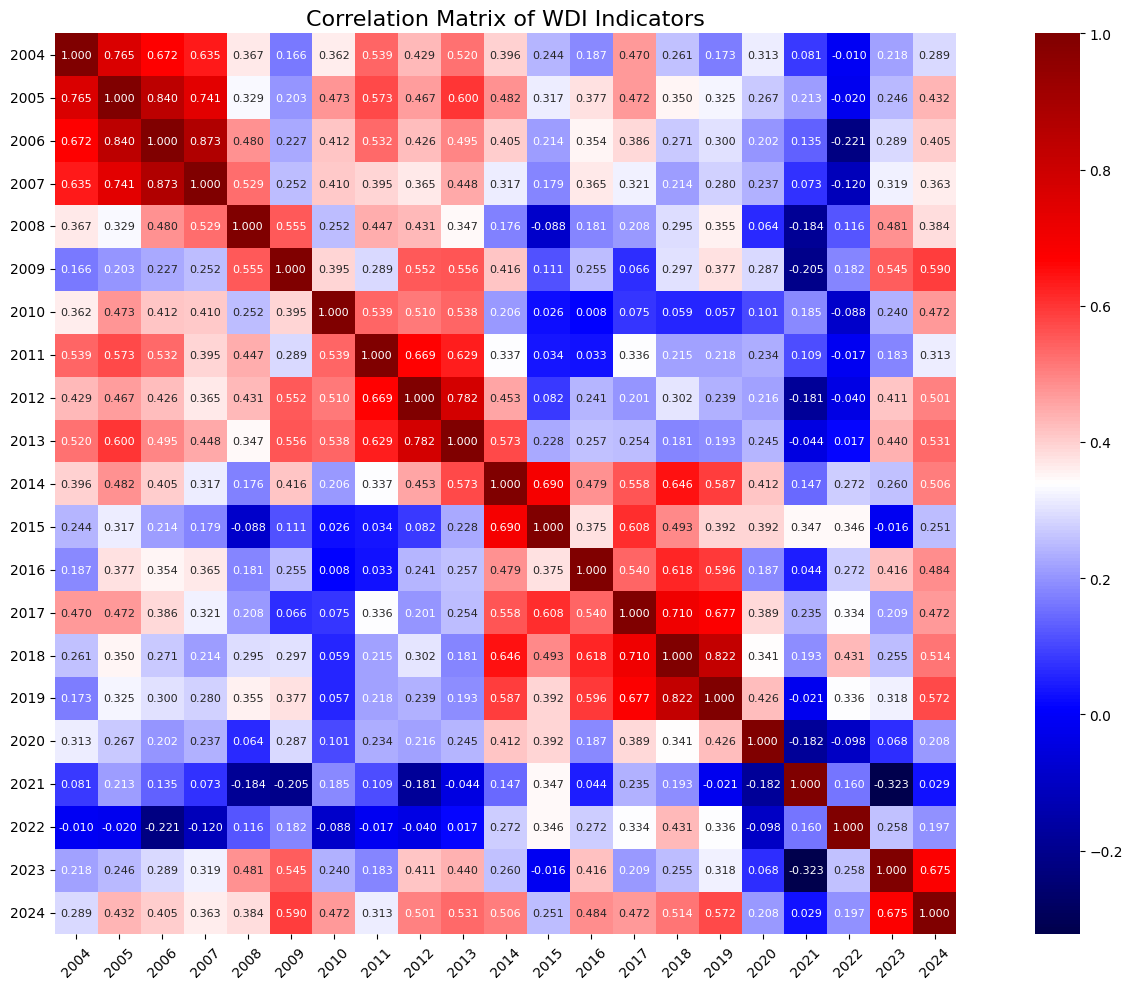

In [10]:
# correlation matrix plot
corr_matrix = df_wdi.drop(['Country Code', 'Country Name'], axis=1).corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            cmap="seismic", 
            fmt=".3f",
            annot=True,
            annot_kws={"size": 8},
            square=True,
            cbar=True)
plt.title('Correlation Matrix of WDI Indicators', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# We load this into a new CSV to execute the analysis
df_wdi.to_csv('clean_data.csv', index=False)